<a href="https://colab.research.google.com/github/Muhammadsulton1/PCA-with-NIPALS/blob/main/PCA_algo_NIPALS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
e1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], dtype=float)
e2 = np.array([1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1], dtype=float)
e3 = np.array([1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1], dtype=float)
e4 = np.array([1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1], dtype=float)
e5 = np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1], dtype=float)

In [3]:
np.random.seed(2214)

x = (np.random.randint(-50, 60, size=(150, 1))\
         *e1 + np.random.randint(-25, 30, size=(150, 1))\
         *e2 + np.random.randint(-12, 14, size=(150, 1))\
         *e3+np.random.randint(-8, 16, size=(150, 1))\
         *e4+np.random.randint(-4, 8, size=(150, 1))\
         *e5+np.random.random(size=(150, 16)))

In [7]:
class PCA:
  def __init__(self, x):
    self.x = x

  def X_center(self, x):
    mean = self.x.mean(axis=0)
    Xcen = self.x - mean
    return Xcen

  def vect_p(self, t_first, Xcen):
    p_vec1 = np.matmul(np.transpose(t_first), Xcen)
    p_vec2 = np.matmul(np.transpose(t_first), t_first)
    p_vec_main = p_vec1 / p_vec2
    return p_vec_main

  def vector_norm(self, p_vec_main):
    p_vec3 = np.matmul(np.transpose(p_vec_main), p_vec_main)
    p_vec_norm = p_vec_main / np.sqrt(p_vec3)
    p_vec4 = np.matmul(p_vec_norm, np.transpose(p_vec_norm))
    return p_vec_norm, p_vec4

  def vector_count(self, Xcen, p_vec_norm, p_vec4):
    t_vec = np.matmul(Xcen, p_vec_norm)
    t_vec_main = t_vec / p_vec4
    return t_vec_main

  def count_vec_a(self, t_first, t_vec_main):
    Dt = t_first - t_vec_main
    vec_a = np.matmul(np.transpose(Dt), Dt)
    return vec_a

  def fit(self):
    Xcen = self.X_center(self.x)
    components = []

    for i in range(x.shape[1]):
      Xcen_trans = np.transpose(Xcen)
      t_first = Xcen_trans[0]
      sqrt_a = 1
      b = 0.1

      while sqrt_a > b:
        p_vec_main = self.vect_p(t_first, Xcen)
        p_vec_norm, p_vec4 = self.vector_norm(p_vec_main)
        t_vec_main = self.vector_count(Xcen, p_vec_norm, p_vec4)
        vec_a = self.count_vec_a(t_first, t_vec_main)
        sqrt_a = np.sqrt(vec_a)
        t_first = t_vec_main

      t_a = t_first
      p_a = p_vec_norm
      t_new = t_a[:, np.newaxis]
      pt_new = p_vec_norm[:, np.newaxis]
      X1 = np.matmul(t_new, np.transpose(pt_new))
      Xcen = -X1 + Xcen
      Xcen_pow = np.power(Xcen, 2)
      Xcen_sum = np.sum(Xcen_pow)
      components.append(Xcen_sum)
      plt.plot(components)
      plt.title('График для выбора достаточности числа главных компонент')
      plt.xlabel('количество компонент')
    return components

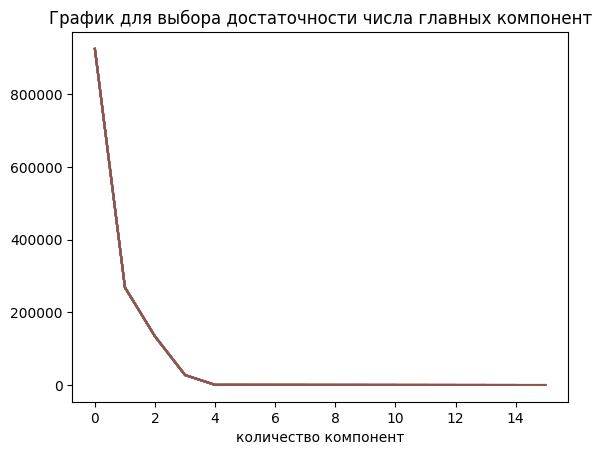

In [8]:
pca = PCA(x).fit()

# Был создан искуственный пример, где мы ожидали, что число главных должно равным 4. После выполнения алгоритма по графику видно, что 4 гланых компонент смог найти алгоритм. Для выбора достаточности числа главных компонент по графику можно выбрать метод локтя.